In [37]:
# imports
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
# load files
file = "../resources/provinces14DayAhead.csv"


In [39]:
# create df for provinces14DayAhead
df = pd.read_csv(file)
df

,Unnamed: 0,date,province,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,DailyTotals,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,population
0,0,2020-02-15,ALBERTA,7.0,3.0,24.0,7.0,-2.0,-1.0,0,0,0,0,0,0,4428247
1,1,2020-02-15,BRITISH COLUMBIA,1.0,0.0,-4.0,2.0,-4.0,0.0,1,8,4,0,0,0,5120184
2,2,2020-02-15,MANITOBA,5.0,2.0,20.0,1.0,1.0,0.0,0,0,0,0,0,0,1379121
3,3,2020-02-15,NEW BRUNSWICK,-3.0,-7.0,-13.0,11.0,-3.0,1.0,0,0,0,0,0,0,780890
4,4,2020-02-15,NEWFOUNDLAND AND LABRADOR,-1.0,-2.0,-16.0,-1.0,-1.0,1.0,0,0,0,0,0,0,520437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,1401,2020-07-25,NEWFOUNDLAND AND LABRADOR,-8.0,4.0,228.0,4.0,0.0,-3.0,0,267,263,0,3,0,520437
1402,1402,2020-07-25,NOVA SCOTIA,-15.0,-10.0,327.0,-23.0,-7.0,0.0,0,1071,1005,0,64,0,978274
1403,1403,2020-07-25,ONTARIO,-22.0,-3.0,220.0,-31.0,-5.0,2.0,70,39967,36131,107,2784,1,14745040
1404,1404,2020-07-25,QUEBEC,-20.0,-6.0,255.0,-25.0,-5.0,1.0,126,60367,50886,0,5692,5,8552362


# Mobility Vs TotalCases

In [40]:
# create features (X) as Mobility(6 features/columns) and target (y) as "TotalCases"

# Select the relevant columns for X
X = df.drop(columns=['Unnamed: 0','date', 'province', 'TotalCases','DailyTotals', 'TotalDeaths',
       'DailyDeaths', 'TotalRecovered', 'DailyRecovered', 'population'], inplace=False)
print(X)
X = X.values
print(X)

y = df['TotalCases'].values
y = y.reshape(-1,1)
y[:2]

      retail_and_recreation  grocery_and_pharmacy  parks  transit_stations  \
0                       7.0                   3.0   24.0               7.0   
1                       1.0                   0.0   -4.0               2.0   
2                       5.0                   2.0   20.0               1.0   
3                      -3.0                  -7.0  -13.0              11.0   
4                      -1.0                  -2.0  -16.0              -1.0   
...                     ...                   ...    ...               ...   
1401                   -8.0                   4.0  228.0               4.0   
1402                  -15.0                 -10.0  327.0             -23.0   
1403                  -22.0                  -3.0  220.0             -31.0   
1404                  -20.0                  -6.0  255.0             -25.0   
1405                  -17.0                   1.0  224.0             -25.0   

      workplaces  residential  
0           -2.0         -1.0  

array([[0],
       [8]], dtype=int64)

In [41]:
# create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [42]:
# Scale the data

X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#  Initiate Model

In [43]:
hidden_layer = 1
number_input_features = 6

nn = Sequential()

nn.add(Dense(units=hidden_layer, input_dim=6, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [44]:
# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1054/1054 [==============================] - 0s 81us/sample - loss: 281742726.4972 - mean_squared_error: 281742720.0000
Epoch 2/100
1054/1054 [==============================] - 0s 39us/sample - loss: 281742195.4915 - mean_squared_error: 281742208.0000
Epoch 3/100
1054/1054 [==============================] - 0s 32us/sample - loss: 281741672.7438 - mean_squared_error: 281741664.0000
Epoch 4/100
1054/1054 [==============================] - 0s 34us/sample - loss: 281741163.0816 - mean_squared_error: 281741152.0000
Epoch 5/100
1054/1054 [==============================] - 0s 35us/sample - loss: 281740651.9013 - mean_squared_error: 281740640.0000
Epoch 6/100
1054/1054 [==============================] - 0s 53us/sample - loss: 281740153.1992 - mean_squared_error: 281740192.0000
Epoch 7/100
1054/1054 [==============================] - 0s 30us/sample - loss: 281739664.3340 - mean_squared_error: 281739712.0000
Epoch 8/100
1054/1054 [==============================] - 0s 46us/sample - lo

1054/1054 [==============================] - 0s 35us/sample - loss: 281637294.3757 - mean_squared_error: 281637312.0000
Epoch 63/100
1054/1054 [==============================] - 0s 38us/sample - loss: 281628505.9279 - mean_squared_error: 281628512.0000
Epoch 64/100
1054/1054 [==============================] - 0s 34us/sample - loss: 281619609.2448 - mean_squared_error: 281619616.0000
Epoch 65/100
1054/1054 [==============================] - 0s 33us/sample - loss: 281610433.7609 - mean_squared_error: 281610432.0000
Epoch 66/100
1054/1054 [==============================] - 0s 33us/sample - loss: 281601105.8216 - mean_squared_error: 281601120.0000
Epoch 67/100
1054/1054 [==============================] - 0s 33us/sample - loss: 281591596.0228 - mean_squared_error: 281591584.0000
Epoch 68/100
1054/1054 [==============================] - 0s 36us/sample - loss: 281582021.3131 - mean_squared_error: 281582016.0000
Epoch 69/100
1054/1054 [==============================] - 0s 35us/sample - loss: 2

# Neural Network with 2x 

In [45]:
hidden_layer = 12
number_input_features = 6

nn = Sequential()

nn.add(Dense(units=hidden_layer, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [46]:
# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1054/1054 [==============================] - 0s 92us/sample - loss: 281747205.6471 - mean_squared_error: 281747232.0000
Epoch 2/100
1054/1054 [==============================] - 0s 40us/sample - loss: 281742691.8558 - mean_squared_error: 281742752.0000
Epoch 3/100
1054/1054 [==============================] - 0s 34us/sample - loss: 281737815.3472 - mean_squared_error: 281737824.0000
Epoch 4/100
1054/1054 [==============================] - 0s 38us/sample - loss: 281732462.3909 - mean_squared_error: 281732480.0000
Epoch 5/100
1054/1054 [==============================] - 0s 35us/sample - loss: 281726241.0323 - mean_squared_error: 281726304.0000
Epoch 6/100
1054/1054 [==============================] - 0s 36us/sample - loss: 281718834.9450 - mean_squared_error: 281718848.0000
Epoch 7/100
1054/1054 [==============================] - 0s 31us/sample - loss: 281710385.7913 - mean_squared_error: 281710368.0000
Epoch 8/100
1054/1054 [==============================] - 0s 35us/sample - lo

1054/1054 [==============================] - 0s 45us/sample - loss: 279054159.9696 - mean_squared_error: 279054176.0000
Epoch 63/100
1054/1054 [==============================] - 0s 49us/sample - loss: 278968158.1784 - mean_squared_error: 278968160.0000
Epoch 64/100
1054/1054 [==============================] - 0s 37us/sample - loss: 278883572.2808 - mean_squared_error: 278883520.0000
Epoch 65/100
1054/1054 [==============================] - 0s 44us/sample - loss: 278793692.2353 - mean_squared_error: 278793696.0000
Epoch 66/100
1054/1054 [==============================] - 0s 41us/sample - loss: 278706492.3264 - mean_squared_error: 278706496.0000
Epoch 67/100
1054/1054 [==============================] - 0s 40us/sample - loss: 278617551.5598 - mean_squared_error: 278617568.0000
Epoch 68/100
1054/1054 [==============================] - 0s 40us/sample - loss: 278525652.9184 - mean_squared_error: 278525632.0000
Epoch 69/100
1054/1054 [==============================] - 0s 44us/sample - loss: 2

# Deep Neural Network


In [48]:
#relu-linear network
#input 6 with (2x)12 neurons and epoch [50]

# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 4

nn = Sequential()

# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Train on 984 samples, validate on 422 samples
Epoch 1/200
984/984 [==============================] - 0s 183us/sample - loss: 152222195.3821 - mean_squared_error: 152222192.0000 - val_loss: 581661333.5355 - val_mean_squared_error: 581661376.0000
Epoch 2/200
984/984 [==============================] - 0s 54us/sample - loss: 152129352.0000 - mean_squared_error: 152129344.0000 - val_loss: 581158231.6588 - val_mean_squared_error: 581158272.0000
Epoch 3/200
984/984 [==============================] - 0s 50us/sample - loss: 152080065.0407 - mean_squared_error: 152080064.0000 - val_loss: 580869096.9479 - val_mean_squared_error: 580869120.0000
Epoch 4/200
984/984 [==============================] - 0s 50us/sample - loss: 152049117.9187 - mean_squared_error: 152049120.0000 - val_loss: 580705567.8483 - val_mean_squared_error: 580705600.0000
Epoch 5/200
984/984 [==============================] - 0s 61us/sample - loss: 152010437.3333 - mean_squared_error: 152010448.0000 - val_loss: 580507005.5735 - va

Epoch 42/200
984/984 [==============================] - 0s 55us/sample - loss: 112355524.8780 - mean_squared_error: 112355528.0000 - val_loss: 433473837.4976 - val_mean_squared_error: 433473856.0000
Epoch 43/200
984/984 [==============================] - 0s 46us/sample - loss: 112350826.7967 - mean_squared_error: 112350840.0000 - val_loss: 433741589.6872 - val_mean_squared_error: 433741568.0000
Epoch 44/200
984/984 [==============================] - 0s 47us/sample - loss: 112314437.5285 - mean_squared_error: 112314448.0000 - val_loss: 433877493.6872 - val_mean_squared_error: 433877504.0000
Epoch 45/200
984/984 [==============================] - 0s 52us/sample - loss: 112299101.9837 - mean_squared_error: 112299096.0000 - val_loss: 434772780.7393 - val_mean_squared_error: 434772800.0000
Epoch 46/200
984/984 [==============================] - 0s 46us/sample - loss: 112307705.2033 - mean_squared_error: 112307704.0000 - val_loss: 433422360.5687 - val_mean_squared_error: 433422400.0000
Epoch

984/984 [==============================] - 0s 51us/sample - loss: 111667665.0407 - mean_squared_error: 111667648.0000 - val_loss: 434476144.7583 - val_mean_squared_error: 434476160.0000
Epoch 84/200
984/984 [==============================] - 0s 50us/sample - loss: 111684910.4228 - mean_squared_error: 111684904.0000 - val_loss: 434023745.8199 - val_mean_squared_error: 434023680.0000
Epoch 85/200
984/984 [==============================] - 0s 48us/sample - loss: 111630816.7154 - mean_squared_error: 111630800.0000 - val_loss: 434976520.7962 - val_mean_squared_error: 434976608.0000
Epoch 86/200
984/984 [==============================] - 0s 62us/sample - loss: 111610321.2358 - mean_squared_error: 111610320.0000 - val_loss: 434607997.8768 - val_mean_squared_error: 434608000.0000
Epoch 87/200
984/984 [==============================] - 0s 66us/sample - loss: 111595068.0000 - mean_squared_error: 111595064.0000 - val_loss: 435549240.7204 - val_mean_squared_error: 435549216.0000
Epoch 88/200
984/9

984/984 [==============================] - 0s 48us/sample - loss: 110939716.3577 - mean_squared_error: 110939728.0000 - val_loss: 435807371.0332 - val_mean_squared_error: 435807424.0000
Epoch 125/200
984/984 [==============================] - 0s 49us/sample - loss: 110824917.1382 - mean_squared_error: 110824920.0000 - val_loss: 437832319.2417 - val_mean_squared_error: 437832320.0000
Epoch 126/200
984/984 [==============================] - 0s 46us/sample - loss: 110833777.5610 - mean_squared_error: 110833776.0000 - val_loss: 438995898.8436 - val_mean_squared_error: 438995872.0000
Epoch 127/200
984/984 [==============================] - 0s 47us/sample - loss: 110787436.2276 - mean_squared_error: 110787432.0000 - val_loss: 437970365.8768 - val_mean_squared_error: 437970400.0000
Epoch 128/200
984/984 [==============================] - 0s 52us/sample - loss: 110773723.6423 - mean_squared_error: 110773704.0000 - val_loss: 438472490.4645 - val_mean_squared_error: 438472544.0000
Epoch 129/200


984/984 [==============================] - 0s 48us/sample - loss: 109877528.7642 - mean_squared_error: 109877512.0000 - val_loss: 443160239.7725 - val_mean_squared_error: 443160288.0000
Epoch 166/200
984/984 [==============================] - 0s 49us/sample - loss: 109844159.0244 - mean_squared_error: 109844136.0000 - val_loss: 443746364.0569 - val_mean_squared_error: 443746368.0000
Epoch 167/200
984/984 [==============================] - 0s 52us/sample - loss: 109817074.0163 - mean_squared_error: 109817072.0000 - val_loss: 444389156.2464 - val_mean_squared_error: 444389184.0000
Epoch 168/200
984/984 [==============================] - 0s 51us/sample - loss: 109753770.4715 - mean_squared_error: 109753784.0000 - val_loss: 443688579.0332 - val_mean_squared_error: 443688576.0000
Epoch 169/200
984/984 [==============================] - 0s 55us/sample - loss: 109759066.4715 - mean_squared_error: 109759064.0000 - val_loss: 442859299.6398 - val_mean_squared_error: 442859296.0000
Epoch 170/200


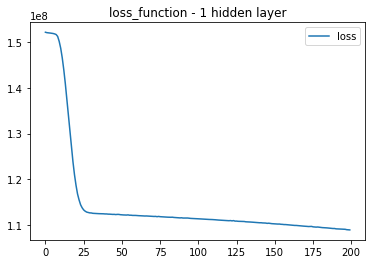

In [50]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()